# 의사결정나무(분류)

In [1]:
!pip install graphviz

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.tree import export_graphviz
import graphviz
from subprocess import call
from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score 
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [3]:
import os
os.environ["PATH"] += os.pathsep + "C:/Program Files/Graphviz/bin/"

In [4]:
matplotlib.rc("font", family = "NanumGothic")
matplotlib.rc("axes", unicode_minus = False)

In [5]:
df_raw = pd.read_csv("./scale_df_dummy.csv",usecols=lambda column: column != "Unnamed: 0")
df_raw.head()

,scale,pt_width,fur_soak_time,rolling_temp,day,hour,minute,weekday_number,pt_length_cluster,steel_kind_T,...,work_group_3조,work_group_4조,is_high_strength_True,is_ship_steel_True,heat_temp_high_True,soak_temp_high_True,both_temp_high_True,descaling_parity_odd,rolling_temp_1000_low,hsb_적용
0,0,3700,59,934,3,7,7,1,2,1,...,0,0,0,1,0,0,0,0,1,1
1,0,3700,53,937,3,7,21,1,2,1,...,0,0,0,1,0,0,0,0,1,1
2,0,3600,55,889,3,7,31,1,2,1,...,0,0,0,0,0,0,0,0,1,1
3,0,3600,68,885,3,7,41,1,2,1,...,0,0,0,0,1,0,0,0,1,1
4,0,3100,48,873,3,7,52,1,2,1,...,0,0,1,1,0,0,0,0,1,1


In [6]:
df_raw.isnull().sum(axis = 0)

scale                        0
pt_width                     0
fur_soak_time                0
rolling_temp                 0
day                          0
hour                         0
minute                       0
weekday_number               0
pt_length_cluster            0
steel_kind_T                 0
rolling_method_TMCP(온도제어)    0
work_group_2조                0
work_group_3조                0
work_group_4조                0
is_high_strength_True        0
is_ship_steel_True           0
heat_temp_high_True          0
soak_temp_high_True          0
both_temp_high_True          0
descaling_parity_odd         0
rolling_temp_1000_low        0
hsb_적용                       0
dtype: int64

In [7]:
df_raw_x = df_raw.drop("scale",axis=1, inplace =False)
df_raw_y = df_raw["scale"]

df_train_x = pd.read_csv("./scale_train_x.csv", usecols=lambda column: column != "Unnamed: 0")
df_train_y= pd.read_csv("./scale_train_y.csv", usecols=lambda column: column != "Unnamed: 0")
df_test_x = pd.read_csv("./scale_test_x.csv", usecols=lambda column: column != "Unnamed: 0")
df_test_y= pd.read_csv("./scale_test_y.csv", usecols=lambda column: column != "Unnamed: 0")

In [8]:
df_train_x.drop("rolling_temp", axis=1, inplace=True)
df_test_x.drop("rolling_temp", axis=1, inplace=True)

In [9]:
df_raw.isnull().sum(axis = 0)

scale                        0
pt_width                     0
fur_soak_time                0
rolling_temp                 0
day                          0
hour                         0
minute                       0
weekday_number               0
pt_length_cluster            0
steel_kind_T                 0
rolling_method_TMCP(온도제어)    0
work_group_2조                0
work_group_3조                0
work_group_4조                0
is_high_strength_True        0
is_ship_steel_True           0
heat_temp_high_True          0
soak_temp_high_True          0
both_temp_high_True          0
descaling_parity_odd         0
rolling_temp_1000_low        0
hsb_적용                       0
dtype: int64

## 불균형 자료 사전 처리:over-sampling-SMOTE

In [10]:
!pip install imblearn

In [11]:
from imblearn.over_sampling import SMOTE

In [12]:
print(df_raw.value_counts(["scale"]),"\n")
print("scale=1 비율  ", df_raw.value_counts(df_raw["scale"]==1)/len(df_raw))

scale
0        684
1        310
Name: count, dtype: int64 

scale=1 비율   scale
False    0.688129
True     0.311871
Name: count, dtype: float64


## 산점도 확인

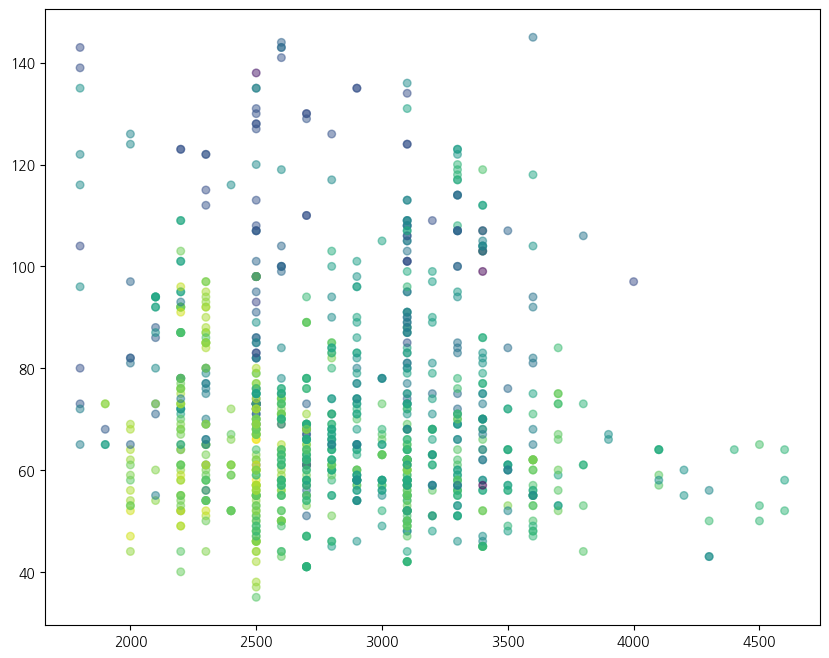

In [13]:
plt.figure(figsize=(10,8))
df_raw['color'] = np.where(df_raw["scale"]==1, "red", "blue")
plt.scatter(df_raw['pt_width'],df_raw['fur_soak_time'],c=df_raw['rolling_temp'], s=30, alpha=0.5)

plt.show()

In [14]:
sm = SMOTE(sampling_strategy='auto', random_state=1234)

x_resampled, y_resampled = sm.fit_resample(df_train_x,df_train_y)

# 결과 확인
print('Over-Sampling 전:\n',df_train_y.value_counts(),"\n")
print('Over-Sampling 후 Train X: {}'.format(x_resampled.shape))
print('Over-Sampling 후 Train Y: {} \n'.format(y_resampled.shape))


print("Over-Sampling 후 '1':", sum(y_resampled["scale"] == 1))
print("Over-Sampling 후 '0':", sum(y_resampled["scale"] == 0))

Over-Sampling 전:
 scale
0        478
1        217
Name: count, dtype: int64 

Over-Sampling 후 Train X: (956, 20)
Over-Sampling 후 Train Y: (956, 1) 

Over-Sampling 후 '1': 478
Over-Sampling 후 '0': 478


   pt_width  fur_soak_time  day  hour  minute  weekday_number  \
0      2800             82    4    13      46               2   
1      2700             57    5    11       4               3   
2      3100             61    6    16      43               4   
3      2900             58   10     0      45               1   
4      3100             88    6    21      52               4   

   pt_length_cluster  steel_kind_T  rolling_method_TMCP(온도제어)  work_group_2조  \
0                  1             0                          0              0   
1                  1             0                          0              0   
2                  1             0                          0              0   
3                  1             0                          0              0   
4                  2             1                          1              1   

   ...  work_group_4조  is_high_strength_True  is_ship_steel_True  \
0  ...              0                      0                

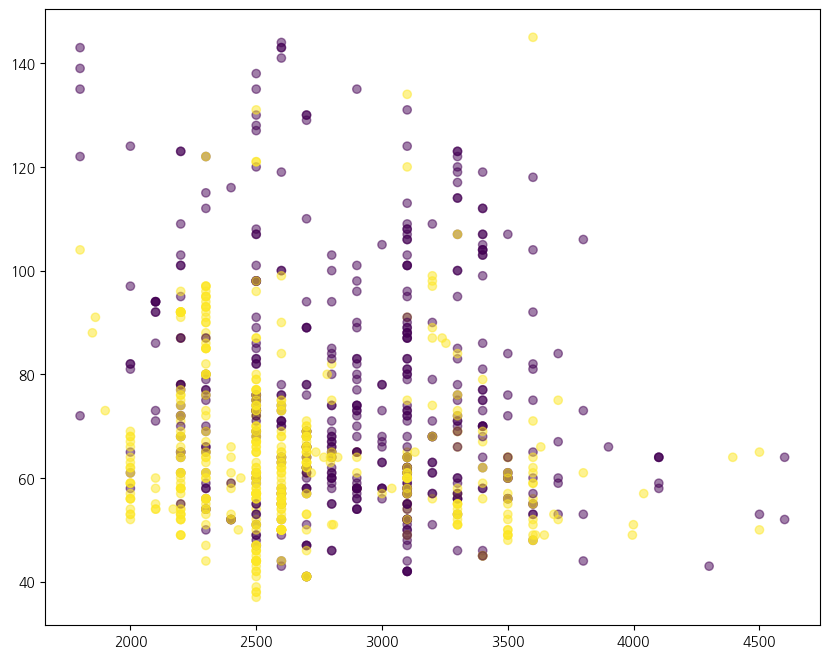

In [15]:
df_resampled = pd.concat([x_resampled,y_resampled], axis=1)
print(df_resampled.head())

plt.figure(figsize=(10,8))
plt.scatter(df_resampled['pt_width'],df_resampled['fur_soak_time'],
            c=df_resampled['scale'],alpha=0.5)
plt.show()

## 모델 생성

In [16]:
tree_uncust = DecisionTreeClassifier(random_state=1234 )
tree_uncust.fit(df_train_x, df_train_y)

print("Accuracy on training set: {:.3f}".format(tree_uncust.score(df_train_x, df_train_y)))
print("Accuracy on test set: {:.3f}".format(tree_uncust.score(df_test_x, df_test_y)))

Accuracy on training set: 1.000
Accuracy on test set: 0.967


## min_samples_leaf(잎사귀 노드의 샘플 수) 조정

In [17]:
train_accuracy = []; test_accuracy = []
para_leaf = [n_leaf * 2 for n_leaf in range(5,16)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeClassifier(min_samples_leaf = v_min_samples_leaf, min_samples_split=40, \
		max_depth=9, random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["TestAccuracy"] = test_accuracy
df_accuracy_leaf["AccuracyGap"] = df_accuracy_leaf["TrainAccuracy"] - df_accuracy_leaf["TestAccuracy"]

In [18]:
para_leaf

[10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]

In [19]:
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy,AccuracyGap
0,10,0.978,0.967,0.012
1,12,0.978,0.967,0.012
2,14,0.978,0.967,0.012
3,16,0.974,0.957,0.018
4,18,0.971,0.960,0.011
5,20,0.970,0.950,0.020
6,22,0.970,0.950,0.020
7,24,0.970,0.950,0.020
8,26,0.970,0.950,0.020
9,28,0.970,0.950,0.020


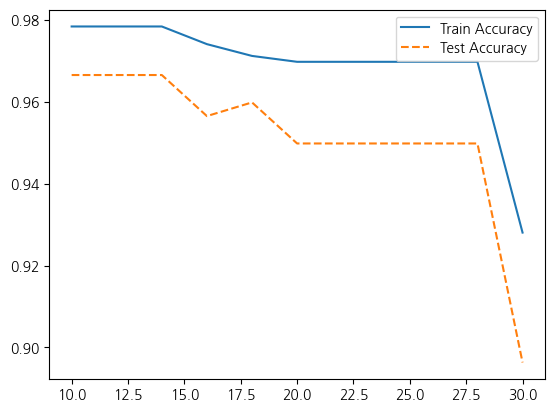

In [20]:
plt.plot(para_leaf, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

In [21]:
12

12

## min_samples_split(분리노드의 최소 샘플 수) 

In [22]:
print("전체 자료 = ", df_train_x.shape[0],"개")
print("전체 자료의 1% = ", df_train_x.shape[0] * 0.01,"개")

전체 자료 =  695 개
전체 자료의 1% =  6.95 개


In [23]:
train_accuracy = []; test_accuracy = []
para_split = [n_split * 10 for n_split in range(2, 16)]

for v_min_samples_split in para_split:
    tree = DecisionTreeClassifier(min_samples_split = v_min_samples_split, min_samples_leaf = 12, random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy
df_accuracy_split["AccuracyGap"] = df_accuracy_split["TrainAccuracy"] - df_accuracy_split["TestAccuracy"]

In [24]:
para_split

[20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150]

In [25]:
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy,AccuracyGap
0,20,0.978,0.967,0.012
1,30,0.978,0.967,0.012
2,40,0.978,0.967,0.012
3,50,0.970,0.950,0.020
4,60,0.970,0.950,0.020
5,70,0.970,0.950,0.020
6,80,0.970,0.950,0.020
7,90,0.970,0.950,0.020
8,100,0.970,0.950,0.020
9,110,0.970,0.950,0.020


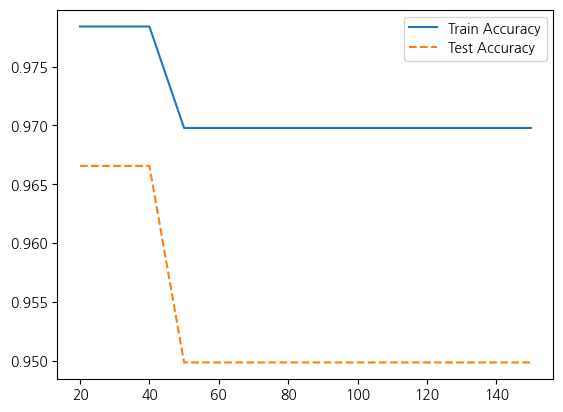

In [26]:
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

In [27]:
40

40

## max_depth(최대 깊이) 

In [28]:
train_accuracy = []; test_accuracy = []

para_depth = [depth for depth in range(3, 12)]

for v_max_depth in para_depth:
    tree = DecisionTreeClassifier(max_depth = v_max_depth, min_samples_split = 40, min_samples_leaf = 12, random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy
df_accuracy_depth["AccuracyGap"] = df_accuracy_depth["TrainAccuracy"] - df_accuracy_depth["TestAccuracy"]

In [29]:
para_depth

[3, 4, 5, 6, 7, 8, 9, 10, 11]

In [30]:
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy,AccuracyGap
0,3,0.970,0.950,0.020
1,4,0.970,0.950,0.020
2,5,0.970,0.950,0.020
3,6,0.970,0.950,0.020
4,7,0.978,0.967,0.012
5,8,0.978,0.967,0.012
6,9,0.978,0.967,0.012
7,10,0.978,0.967,0.012
8,11,0.978,0.967,0.012


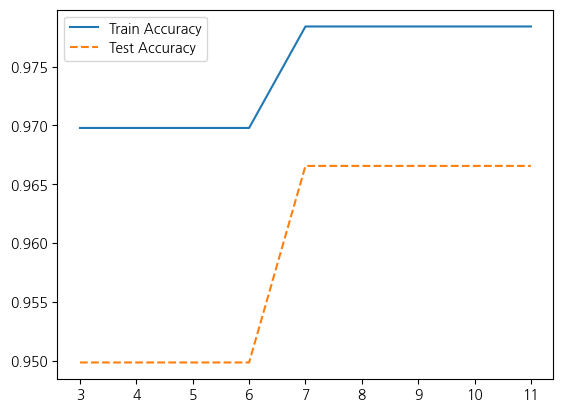

In [31]:
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

In [32]:
7

7

## 최종모델 선정

In [33]:
final_tree = DecisionTreeClassifier(max_depth=7, min_samples_split=40, min_samples_leaf=12, random_state=1234)
final_tree.fit(df_train_x, df_train_y)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=12, min_samples_split=40,
                       random_state=1234)

In [34]:
v_feature_name = df_train_x.columns

In [35]:
# export_graphviz(final_tree, out_file="final_tree.dot", class_names = ["Good", "Bad"],
#                 feature_names = v_feature_name, impurity = True, filled = True)

# with open("final_tree.dot", encoding="utf-8") as f:
#     dot_graph = f.read()
# display(graphviz.Source(dot_graph))

In [36]:
y_pred = final_tree.predict(df_test_x)
print("Train Accuracy: {0:.3f}".format(final_tree.score(df_train_x, df_train_y)))
print("Test Accuracy: {0:.3f}".format(final_tree.score(df_test_x, df_test_y)))
print("Test Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))
print(classification_report(df_test_y, y_pred, digits=3))

Train Accuracy: 0.978
Test Accuracy: 0.967
Test Confusion matrix: 
[[205   1]
 [  9  84]]
              precision    recall  f1-score   support

           0      0.958     0.995     0.976       206
           1      0.988     0.903     0.944        93

    accuracy                          0.967       299
   macro avg      0.973     0.949     0.960       299
weighted avg      0.967     0.967     0.966       299



## 설명변수 중요도

## 설명변수 중요도

In [37]:
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = final_tree.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
18,rolling_temp_1000_low,0.550
19,hsb_적용,0.204
17,descaling_parity_odd,0.186
3,hour,0.034
6,pt_length_cluster,0.011
16,both_temp_high_True,0.010
1,fur_soak_time,0.003
11,work_group_4조,0.001
12,is_high_strength_True,0.000
15,soak_temp_high_True,0.000


Text(0, 0.5, '설명변수')

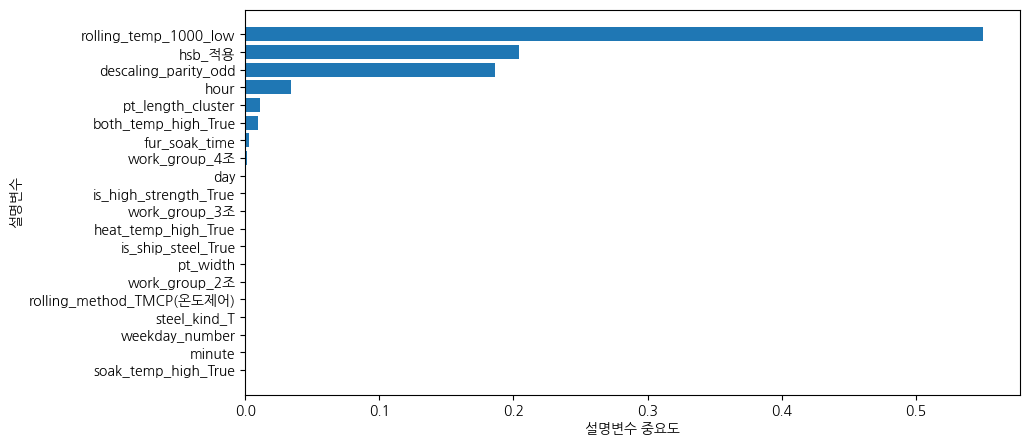

In [38]:
df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))

plt.figure(figsize=(10,5))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

## Over-sampling Data이용한 모델링 및 평가

In [39]:
# 데이터 분할 train_test_split(X: 설명변수, Y: 목표변수, test_size = test 데이터 비율)
df_train_x_over, df_test_x_over, df_train_y_over, df_test_y_over = train_test_split(
    x_resampled, y_resampled, test_size = 0.3, stratify=y_resampled, random_state = 1234) 

print("분할 전 데이터 현황... 설명:", x_resampled.shape, "  목표:", y_resampled.shape)
print("분할 후 설명변수 현황...Train:", df_train_x_over.shape, " Test:", df_test_x_over.shape)
print("분할 후 목표변수 현황...Train:", df_train_y_over.value_counts(), " Test:", df_test_y_over.value_counts())

분할 전 데이터 현황... 설명: (956, 20)   목표: (956, 1)
분할 후 설명변수 현황...Train: (669, 20)  Test: (287, 20)
분할 후 목표변수 현황...Train: scale
0        335
1        334
Name: count, dtype: int64  Test: scale
1        144
0        143
Name: count, dtype: int64


In [40]:
v_feature_name = df_train_x.columns

In [41]:
tree_final_over = DecisionTreeClassifier(max_depth=7, min_samples_split=40, min_samples_leaf=12, random_state=1234)

tree_final_over.fit(df_train_x_over, df_train_y_over)


DecisionTreeClassifier(max_depth=7, min_samples_leaf=12, min_samples_split=40,
                       random_state=1234)

In [42]:
# export_graphviz(tree_final_over, out_file="tree_final_over.dot", class_names = ["Good", "Bad"],
#                 feature_names = v_feature_name, impurity = True, filled = True)

# with open("tree_final_over.dot") as f:
#     dot_graph = f.read()
# display(graphviz.Source(dot_graph))

## Grid Search

In [43]:
# import sys
# import io
# sys.stdout = io.TextIOWrapper(sys.stdout.detach(), encoding='utf-8')
estimator = DecisionTreeClassifier()
# 구하고자 하는 parameter와 범위
param_grid = {"max_depth": para_depth, "min_samples_split": para_split,
              "min_samples_leaf": para_leaf}
# 정확도가 높은 최적 parameter 찾기
grid_dt = GridSearchCV(estimator, param_grid, scoring="accuracy", n_jobs = -1)
grid_dt.fit(df_train_x, df_train_y)

print("best estimator model:\n", grid_dt.best_estimator_)
print("\nbest parameter:\n", grid_dt.best_params_)
print("\nbest score:\n", round(grid_dt.best_score_, 3))


best estimator model:
 DecisionTreeClassifier(max_depth=7, min_samples_leaf=10, min_samples_split=20)

best parameter:
 {'max_depth': 7, 'min_samples_leaf': 10, 'min_samples_split': 20}

best score:
 0.973


In [44]:
## StratifiedKFold

In [45]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt

# 최적 파라미터 (의사결정나무)
best_params_dt = {
    'max_depth': 8,
    'min_samples_leaf': 10,
    'min_samples_split': 20,
    'random_state': 42
}

# Stratified K-Fold 설정
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 결과 저장용 리스트
acc_list = []
f1_list = []
auc_list = []
fold = 1

X = df_train_x
y = df_train_y.values.ravel()

print("✅ [의사결정나무 모델 - Stratified K-Fold 평가 + AUC]\n")

for train_idx, val_idx in skf.split(X, y):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    model = DecisionTreeClassifier(**best_params_dt)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    y_prob = model.predict_proba(X_val)[:, 1]  # AUC용 확률값

    acc = accuracy_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    fpr, tpr, _ = roc_curve(y_val, y_prob)
    roc_auc = auc(fpr, tpr)

    acc_list.append(acc)
    f1_list.append(f1)
    auc_list.append(roc_auc)

    print(f"\n📂 Fold {fold}")
    print(f"Accuracy: {acc:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC: {roc_auc:.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_val, y_pred))
    print(classification_report(y_val, y_pred, digits=3))

    fold += 1

# 평균 결과 출력
print("\n✅ Stratified K-Fold 평균 성능 (Decision Tree)")
print(f"Average Accuracy: {np.mean(acc_list):.4f}")
print(f"Average F1 Score: {np.mean(f1_list):.4f}")
print(f"Average AUC: {np.mean(auc_list):.4f}")


✅ [의사결정나무 모델 - Stratified K-Fold 평가 + AUC]


📂 Fold 1
Accuracy: 0.9640
F1 Score: 0.9438
AUC: 0.9940
Confusion Matrix:
[[92  3]
 [ 2 42]]
              precision    recall  f1-score   support

           0      0.979     0.968     0.974        95
           1      0.933     0.955     0.944        44

    accuracy                          0.964       139
   macro avg      0.956     0.961     0.959       139
weighted avg      0.964     0.964     0.964       139


📂 Fold 2
Accuracy: 0.9640
F1 Score: 0.9451
AUC: 0.9977
Confusion Matrix:
[[91  4]
 [ 1 43]]
              precision    recall  f1-score   support

           0      0.989     0.958     0.973        95
           1      0.915     0.977     0.945        44

    accuracy                          0.964       139
   macro avg      0.952     0.968     0.959       139
weighted avg      0.966     0.964     0.964       139


📂 Fold 3
Accuracy: 0.9568
F1 Score: 0.9302
AUC: 0.9920
Confusion Matrix:
[[93  3]
 [ 3 40]]
              precision